### Exploratory data analysis or in short, EDA, is an approach to analyze data in order to:
- Summarize main characteristics of the data
- Gain better understanding of the data set
- Uncover relationships between different variables and extract important variables for the problem we're trying to solve.

### What we will be going through this notebook
- Descriptive statistics which describe basic features of a data set and obtains a short summary about the sample and measures of the data. Describe Function, Value_Counts Function, Box Plot, Scatter Plot.
- Basic of grouping data using GroupBy and how this can help to transform our data set.
- The correlation between different variables.
- Advanced correlation, where we'll introduce you to various correlation statistical methods, namely Pearson correlation and correlation heatmaps.


In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [6]:
# importing the dataset 
df = pd.read_csv("automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
#  Descriptive statistics
# .describe function will give us numerical values alone, unless modified in another way  "to include categorical 'include = all'"
df.describe(include = 'all')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [8]:
#  value counts--- really helps in categorical variables / discrete values
# example to find the number of unique occasions in a column
drive_wheel_counts = df['drive-wheels'].value_counts()
drive_wheel_counts

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

<Axes: xlabel='drive-wheels', ylabel='price'>

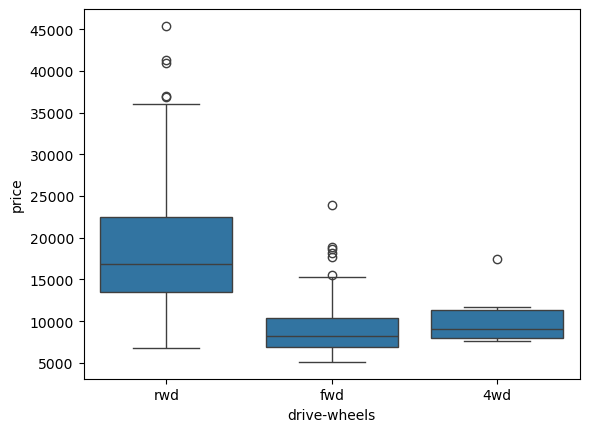

In [9]:
# boxplots are a good way to visualize numerical data
sns.boxplot(x = 'drive-wheels', y = 'price' , data = df)

Text(0, 0.5, 'Price')

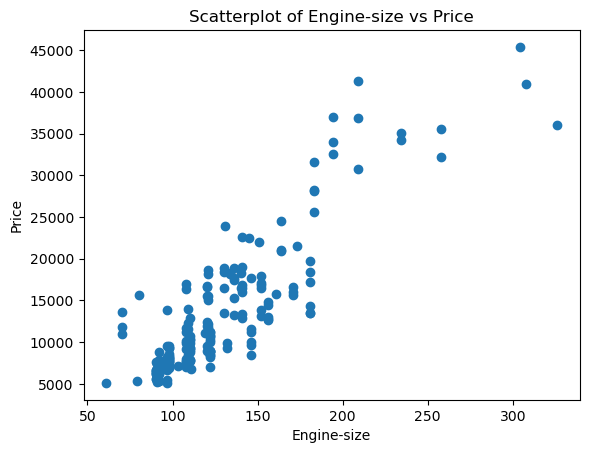

In [10]:
# Scatter plots help visualize  contniuos values
y = df['price']
x = df['engine-size']
plt.scatter(x,y)
plt.title('Scatterplot of Engine-size vs Price')
plt.xlabel("Engine-size")
plt.ylabel("Price")

In [15]:
#  Group by in python ....mainly works for categorical variables

